In [2]:
import pandas as pd
import numpy as np

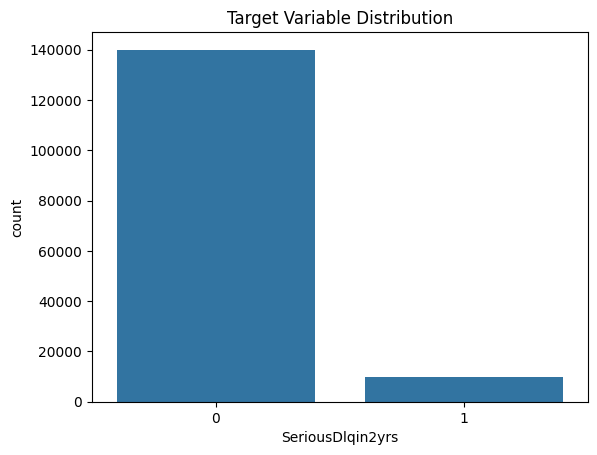

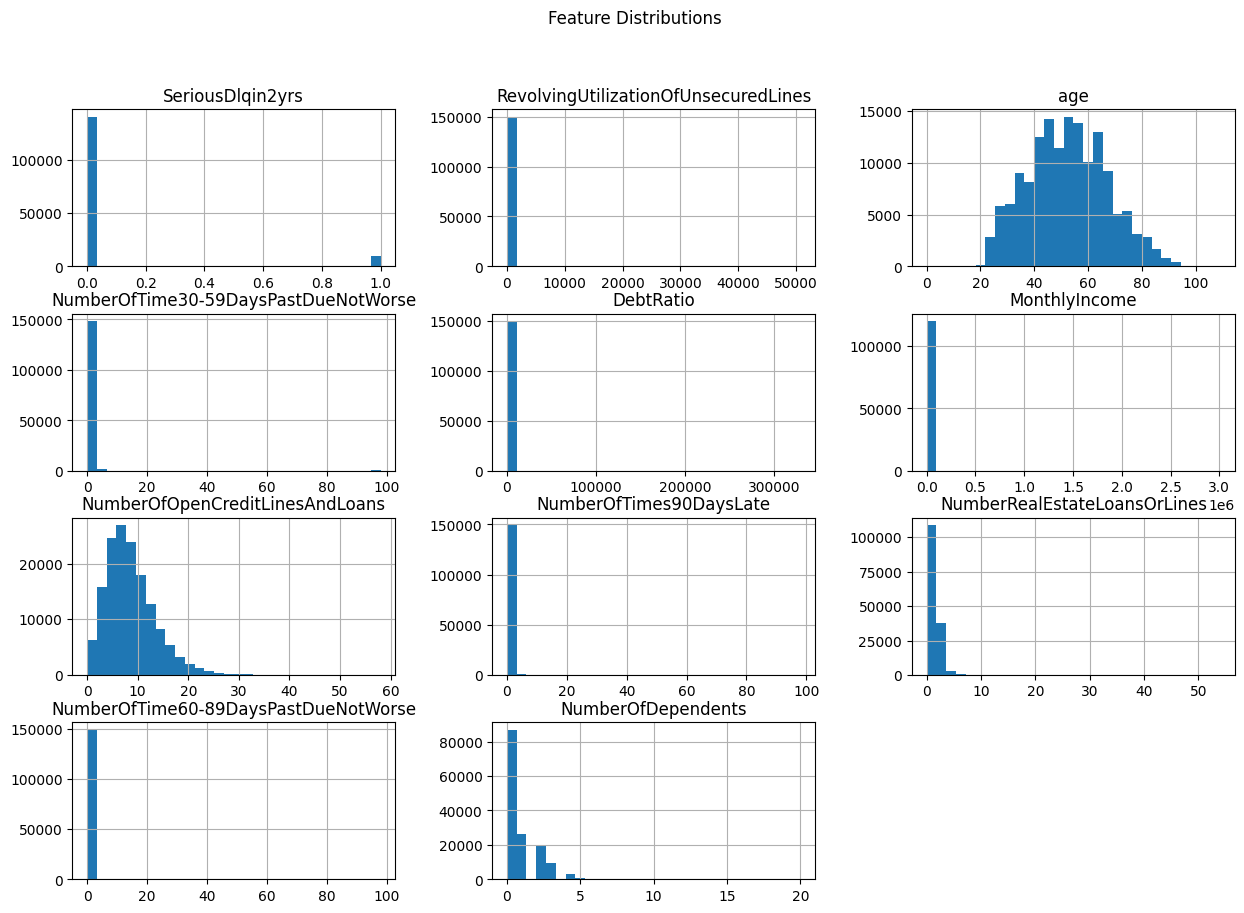

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("datasets/cs-training.csv")

# --- Basic cleanup ---
# Drop the extra index column (it’s just a redundant counter from the original CSV)
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
    
# Target distribution
sns.countplot(x='SeriousDlqin2yrs', data=data)
plt.title("Target Variable Distribution")
plt.show()

# Histograms for numeric columns
data.hist(bins=30, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

In [4]:
data.describe() # Quantitative summary statistics of each feature column

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Key notes/interesting parts of summary statistics and variable visualizations

- Very low mean of `SeriousDlqin2yrs` - heavy imbalance towards `False` or `0` values
- Very low mean and 1st, 2nd, and 3rd quartile values compared to max of `RevolvingUtilizationOfUnsecuredLines` - shows that there are some extreme outlier(s)
- `age` is quite standard, follows near-normal distribution
- Very low mean and quartile values for `NumberOfTime30-59DaysPastDueNotWorse` while having some strong upper outliers
- Same thing for `DebtRatio`, `MonthlyIncome` (relatively), `NumberOfOpenCreditLinesAndLoans` (moderately), `NumberOfTimes90DaysLate`, `NumberRealEstateLoansOrLines`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfDependents`
- Suspect very high correlation amongst `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse` given the statistics look almost exactly the same
- Given the very small amount of outliers, suspecting that these outlying datapoints are the main contribution to the `True` or `1` values in `SeriousDlqin2yrs`

In [5]:
### Beginning quantitative data summary
data # General data view

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [9]:
data.shape # Data size (m rows, n columns)

(150000, 11)

In [6]:
data.info() # Data types, null counts of each feature column, also explained in the data dictionary
# Can also use data.dtypes for displaying solely Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

## Notes about data info

- 150000 total datapoints, 11 feature variables
- 29731 missing values in `MonthlyIncome` variable
- 3924 missing values in `NumberOfDependents` variable

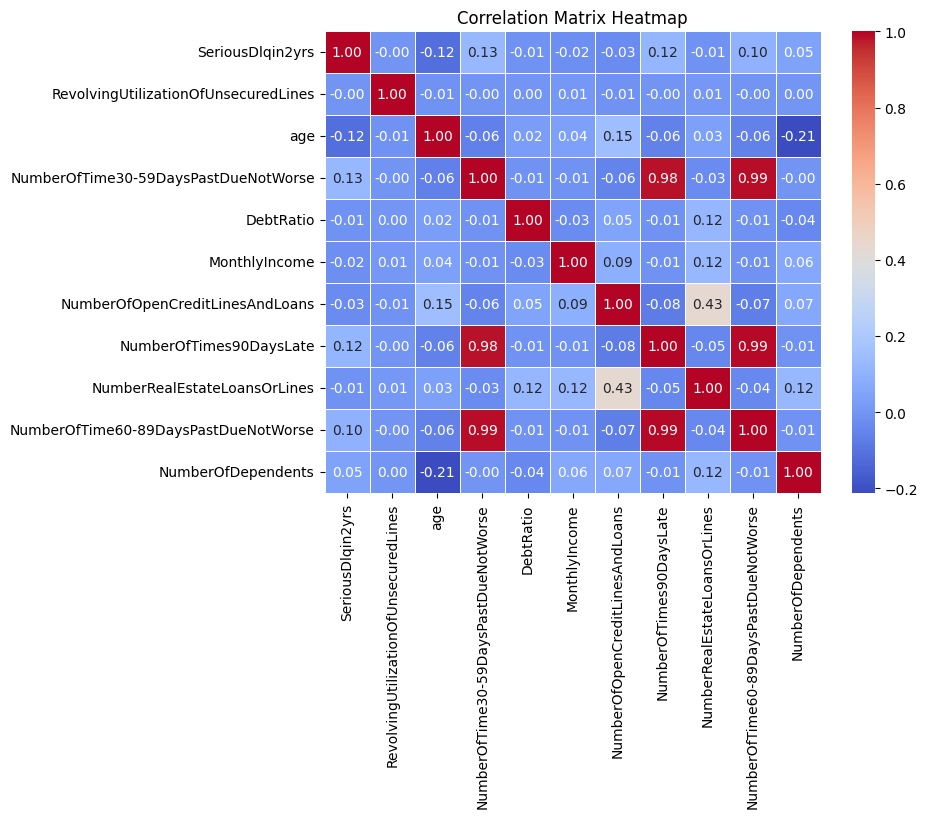

In [8]:
# Plot correlation matrix to see correlation amongst feature variables
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Notes on correlation

- High correlation found between `NumberOfTime30-59DaysPastDueNotWorse` and the two features `NumberOfTimes90DaysLate`and `NumberOfTime60-89DaysPastDueNotWorse` (multi-colinearity)
- High corrrelation amongst `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`
- Moderate correlation found between `NumberOfOpenCreditLinesAndLoans` and `NumberRealEstateLoansOrLines`

# Executive Summary of EDA

- Total of 150000 data samples across 1 boolean, 6 integer, and 4 decimal feature variables (total of 11 feature variables)
- Numerous outliers present in data which is very likely reason for heavy class imbalance towards `0` of `SeriousDlqin2yrs`
    - Suspect these outliers are the main datapoints where `SeriousDlqin2yrs` has value of `1`
- Correleation amongst 2 pairs of feature variables, multi-colinearity amongst 3 feature variables